### Assignment
- Dacon,kaggle 코드 리뷰!
- 본인이 직접 선택해서 앙상블 기법을 이용한 코드를 리뷰해주시면 됩니다!
- Ex : Random forest, Xgboost 그외 모든 ensemble model
- 채점 기준은 다음과 같습니다.
    - 상세한 코드 리뷰 (앙상블 기법, 파라미터 튜닝 중점적으로)
    - 코드 자체의 완성도 및 대회의 난이도
- 앞서 배운 강의의 다양한 모델과 기법들을 활용해서 리뷰해주세요!
- 코드 가져온 링크도 반드시 첨부해주세요! 채점할 때 사용합니다.
- Baseline Model은 안됩니다!

> #### 코드 출처
> https://dacon.io/competitions/official/236035/codeshare/7544

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 데이터 불러오기
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample = pd.read_csv('./snp_info.csv')

In [3]:
# 전처리를 위해 데이터 통합
df = pd.concat([train, test], ignore_index=True)
df1 = df.drop(['id'],axis=1) # 필요 없는 열 제거
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   father  437 non-null    int64 
 1   mother  437 non-null    int64 
 2   gender  437 non-null    int64 
 3   trait   437 non-null    int64 
 4   SNP_01  437 non-null    object
 5   SNP_02  437 non-null    object
 6   SNP_03  437 non-null    object
 7   SNP_04  437 non-null    object
 8   SNP_05  437 non-null    object
 9   SNP_06  437 non-null    object
 10  SNP_07  437 non-null    object
 11  SNP_08  437 non-null    object
 12  SNP_09  437 non-null    object
 13  SNP_10  437 non-null    object
 14  SNP_11  437 non-null    object
 15  SNP_12  437 non-null    object
 16  SNP_13  437 non-null    object
 17  SNP_14  437 non-null    object
 18  SNP_15  437 non-null    object
 19  class   262 non-null    object
dtypes: int64(4), object(16)
memory usage: 68.4+ KB


In [4]:
# 특정 column을 category형 변수로 변환
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]
for snp_col in df1.columns:
    df1[snp_col] = df1[snp_col].astype('category').cat.codes

In [35]:
#파생 변수 생성
df1['chrom6'] = (df1['SNP_02']+df1['SNP_03']+df1['SNP_04']+df1['SNP_05']+df1['SNP_06']+df1['SNP_07']+df1['SNP_08']+df1['SNP_09'])/8
df1['chrom9'] = (df1['SNP_12']+df1['SNP_13']+df1['SNP_14'])/3
df1['cm_pos'] = (df1['SNP_03']+df1['SNP_04']+df1['SNP_05']+df1['SNP_06']+df1['SNP_07']+df1['SNP_08']+df1['SNP_09']
                +df1['SNP_10']+df1['SNP_12']+df1['SNP_13']+df1['SNP_14']+df1['SNP_15'])/13
df1['name_ARS'] = (df1['SNP_02']+df1['SNP_03']+df1['SNP_04']+df1['SNP_09']+df1['SNP_11'])/5
df1['name_BOV'] = (df1['SNP_05']+df1['SNP_06']+df1['SNP_08']+df1['SNP_15'])/4
df1['name_HAP'] = (df1['SNP_07']+df1['SNP_12']+df1['SNP_14'])/3
df1['name_BT'] = (df1['SNP_01']+df1['SNP_10']+df1['SNP_13'])/3
df1

,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,...,SNP_14,SNP_15,class,chrom6,chrom9,cm_pos,name_ARS,name_BOV,name_HAP,name_BT
0,0,0,0,1,2,1,0,1,1,0,...,0,0,1,0.625,0.000000,0.461538,0.6,0.75,0.000000,1.333333
1,0,0,0,1,1,1,1,0,0,1,...,0,0,2,0.500,1.000000,0.538462,0.4,0.50,0.333333,1.333333
2,0,0,0,1,2,2,0,1,2,2,...,0,0,1,1.125,0.000000,0.615385,0.8,1.25,0.000000,1.000000
3,0,0,0,0,0,2,0,1,0,2,...,0,2,0,1.125,1.333333,1.076923,1.4,1.00,1.333333,1.000000
4,0,0,0,1,2,2,2,0,2,0,...,0,1,2,0.750,0.333333,0.615385,0.8,0.75,0.000000,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,0,0,0,1,1,2,2,0,1,1,...,0,1,-1,1.000,0.000000,0.692308,1.2,1.25,0.000000,1.000000
433,0,0,0,1,2,0,0,0,1,1,...,0,1,-1,0.250,0.333333,0.384615,0.0,0.75,0.000000,1.333333
434,0,0,0,1,2,0,0,0,1,1,...,0,2,-1,0.250,0.333333,0.538462,0.2,1.00,0.000000,1.666667
435,0,0,0,1,1,2,1,1,2,2,...,0,0,-1,1.125,0.000000,0.692308,1.0,1.25,0.000000,1.000000


In [121]:
#feature selection
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 특정 feature 선택
dfx = df1[['trait','SNP_01','SNP_02','SNP_03','SNP_04','SNP_05','SNP_06','SNP_07',
          'SNP_08','SNP_09','SNP_10','SNP_11','SNP_12','SNP_13',
          'SNP_14','SNP_15','chrom6','chrom9','name_ARS','name_BOV','name_HAP','name_BT']]
dfy = df1['class']

xtrain = dfx.iloc[:len(train)]
xsubmission = dfx.iloc[len(train):]
# label encoding 수행
class_le = preprocessing.LabelEncoder()
ytrain = class_le.fit_transform(train['class'])
xtrain['class'] = ytrain
xtrain

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_13,SNP_14,SNP_15,chrom6,chrom9,name_ARS,name_BOV,name_HAP,name_BT,class
0,1,2,1,0,1,1,0,0,2,0,...,0,0,0,0.625,0.000000,0.6,0.75,0.000000,1.333333,1
1,1,1,1,1,0,0,1,0,1,0,...,2,0,0,0.500,1.000000,0.4,0.50,0.333333,1.333333,2
2,1,2,2,0,1,2,2,0,1,1,...,0,0,0,1.125,0.000000,0.8,1.25,0.000000,1.000000,1
3,0,0,2,0,1,0,2,2,0,2,...,2,0,2,1.125,1.333333,1.4,1.00,1.333333,1.000000,0
4,1,2,2,2,0,2,0,0,0,0,...,1,0,1,0.750,0.333333,0.8,0.75,0.000000,1.666667,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1,1,1,0,1,2,1,0,1,0,...,0,0,0,0.750,0.333333,0.6,1.00,0.333333,1.000000,1
258,1,2,0,1,0,0,1,1,1,0,...,1,0,1,0.500,0.333333,0.4,0.75,0.333333,1.333333,2
259,0,1,2,0,1,0,1,2,1,1,...,2,1,2,1.000,1.666667,1.2,1.00,1.666667,1.000000,0
260,0,0,2,0,1,0,2,2,0,1,...,2,1,2,1.000,1.333333,1.0,1.00,1.333333,1.000000,0


In [122]:
#pycaret 기반 model comparision
from pycaret.classification import * 
clf = setup(data=xtrain, target='class'
            ,session_id=42)
models = compare_models(fold=5, round=4, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9566,0.9855,0.9586,0.9581,0.9566,0.9328,0.9337,0.0460
lda,Linear Discriminant Analysis,0.9514,0.9897,0.9553,0.9544,0.9512,0.9249,0.9267,0.0040
et,Extra Trees Classifier,0.9512,0.9875,0.9519,0.9523,0.9511,0.9243,0.9250,0.0380
xgboost,Extreme Gradient Boosting,0.9456,0.9879,0.9495,0.9485,0.9458,0.9162,0.9175,0.0220
lightgbm,Light Gradient Boosting Machine,0.9455,0.9901,0.9505,0.9479,0.9456,0.9157,0.9169,0.0140
lr,Logistic Regression,0.9405,0.9922,0.9414,0.9406,0.9404,0.9077,0.9079,0.5000
knn,K Neighbors Classifier,0.9402,0.9920,0.9386,0.9410,0.9400,0.9071,0.9078,0.2520
gbc,Gradient Boosting Classifier,0.9348,0.9883,0.9369,0.9355,0.9348,0.8992,0.8996,0.0380
ridge,Ridge Classifier,0.9351,0.0000,0.9353,0.9361,0.9345,0.8990,0.9002,0.2600
svm,SVM - Linear Kernel,0.9078,0.0000,0.9148,0.9124,0.9080,0.8584,0.8605,0.0040


In [123]:
#개별 model 생성
model_et = create_model('et', fold = 5)
model_lr = create_model('lr', fold = 5)
model_rf = create_model('rf', fold = 5)
model_lda = create_model('lda', fold = 5)
model_lightgbm = create_model('lightgbm', fold = 5)

#model tuning
tuned_lr = tune_model(model_lr, fold=5, optimize = 'F1', choose_better = True)
tuned_lda = tune_model(model_lda, fold=5, optimize = 'F1', choose_better = True)
tuned_rf = tune_model(model_rf, fold=5, optimize = 'F1', choose_better = True)
tuned_et = tune_model(model_et, fold=5, optimize = 'F1', choose_better = True)
tuned_lightgbm = tune_model(model_lightgbm, fold=5, optimize = 'F1', choose_better = True)

#model ensemble
blend_models = blend_models(estimator_list = [tuned_lda,tuned_lr,tuned_et,tuned_rf,tuned_lightgbm], optimize = 'F1')
blend_models 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,1.0000,0.9444,0.9532,0.9465,0.9188,0.9228
1,0.8947,0.9383,0.8963,0.8947,0.8947,0.8348,0.8348
2,0.9474,0.9910,0.9630,0.9561,0.9482,0.9188,0.9228
3,0.8889,0.9791,0.8963,0.8889,0.8889,0.8218,0.8218
4,0.9444,0.9902,0.9583,0.9537,0.9451,0.9155,0.9199
5,0.9444,1.0000,0.9583,0.9537,0.9451,0.9155,0.9199
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


VotingClassifier(estimators=[('lda',
                              LinearDiscriminantAnalysis(n_components=None,
                                                         priors=None,
                                                         shrinkage=0.2,
                                                         solver='lsqr',
                                                         store_covariance=False,
                                                         tol=0.0001)),
                             ('lr',
                              LogisticRegression(C=7.898000000000001,
                                                 class_weight={}, dual=False,
                                                 fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n

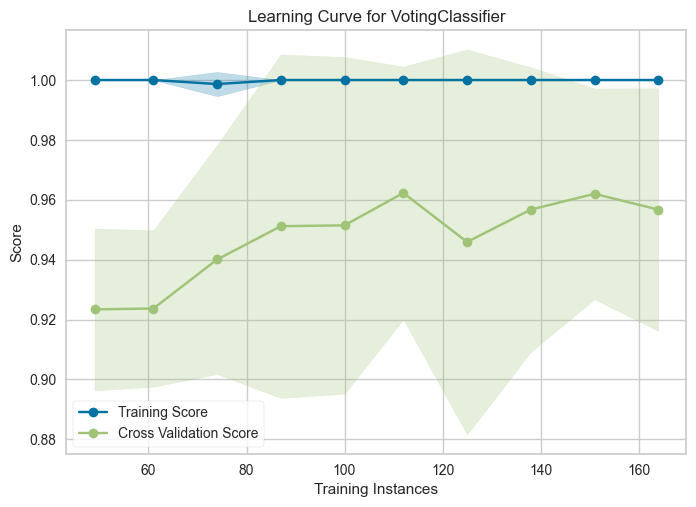

In [124]:
#model 성능 확인1
plot_model(blend_models, plot='learning')

In [131]:
#model 성능 확인2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import roc_auc_score, precision_score, accuracy_score, f1_score

xtrain = dfx.iloc[:len(train),:]
xtest = dfx.iloc[len(train):,:]
ytrain = dfy.iloc[:len(train)]
class_le = preprocessing.LabelEncoder()
ytrain = class_le.fit_transform(train['class'])

scale = StandardScaler().fit(xtrain)
xtrain_scaled = scale.transform(xtrain)
xtest_scaled = scale.transform(xtest)
x_train, x_test, y_train, y_test = train_test_split(xtrain_scaled, ytrain, test_size=0.25)

def get_scores(model, xtrain, xtest, ytrain, ytest):
    ypred1 = model.predict(xtrain)
    ypred2 = model.predict(xtest)
    A = f1_score(ytrain, ypred1, average='macro')
    B = f1_score(ytest, ypred2, average='macro')
    return [round(A,3), round(B,3)]

def make_models(xtrain, xtest, ytrain, ytest):
    model1 = LogisticRegression(solver='liblinear',penalty='l1', random_state=0).fit(x_train, y_train)
    print('model1', get_scores(model1, x_train, x_test, y_train, y_test))

    model2 = RandomForestClassifier(min_samples_split=2,max_depth=7,max_leaf_nodes=11,n_estimators=125,random_state=0).fit(x_train, y_train)  #max_depth, learning_rate 활용
    print('model2:', get_scores(model2, x_train, x_test, y_train, y_test)) 
    
    model3 = ExtraTreesClassifier(min_samples_split=11,max_depth=6,n_estimators=118,random_state=0).fit(x_train, y_train)  #max_depth, learning_rate 활용
    print('model3:', get_scores(model3, x_train, x_test, y_train, y_test)) 
    
    model4 = blend_models.fit(x_train, y_train) 
    print('model4:', get_scores(model4, x_train, x_test, y_train, y_test)) 
    
make_models(x_train, x_test, y_train ,y_test)

model1 [0.966, 0.986]
model2: [0.961, 0.986]
model3: [0.981, 0.971]
model4: [1.0, 0.971]
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: fe

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will b

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:740: Runt

[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will b

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:740: Runt

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will b

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:740: Runt

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will b

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_interce

[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will b

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/minwoo/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_interce

In [125]:
#생성 model 기반 class 분류 예측
final_model = finalize_model(blend_models)
predict_final = predict_model(final_model, data=xsubmission)
submit = pd.read_csv('./sample_submission.csv')
submit['class'] = class_le.inverse_transform(predict_final['Label'])
submit.to_csv('./submit.csv', index=False)
submit['class'] 

0      A
1      B
2      C
3      C
4      A
      ..
170    B
171    C
172    C
173    B
174    B
Name: class, Length: 175, dtype: object